1.Sovlor 是什麼
2.把範例操作一次
https://ycy-blog.herokuapp.com/article/python-efficient-frontier/#_7

# 投資組合預期報酬率與風險

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as solver
#這個套件類似Excel中的規劃求解，可以求出極小化的狀況

from functools import reduce

In [16]:
df = pd.read_csv('Efficient Frontier.csv',index_col=0, parse_dates=True)

In [23]:
total_stocks = len(df.columns) #股票個數

returns = df.pct_change() #計算當前元素與先前元素的百分比變化
returns = returns[1:] #去除第一天報酬率的缺失值
returns.head()

,2317,2542,2881,2324,2535,5880,1101,2330,2301,4938
2019-01-03,-0.017118,0.012360,-0.006508,-0.002865,-0.005115,0.005682,-0.009859,-0.018223,0.020910,-0.011952
2019-01-04,-0.018868,0.004440,-0.010917,-0.017241,-0.007712,-0.002825,0.008535,-0.034803,-0.020482,-0.022177
2019-01-07,0.025148,0.007735,0.014349,0.020468,0.010363,0.002833,0.015515,0.024038,0.019680,0.000000
2019-01-08,-0.010101,-0.009868,-0.005441,-0.005731,0.005128,0.005650,-0.012500,-0.009390,0.003619,-0.022680
2019-01-09,0.018950,0.021041,0.029540,0.014409,0.020408,0.011236,0.022504,0.021327,0.040865,0.012658


In [87]:
covariance_matrix 

,2317,2542,2881,2324,2535,5880,1101,2330,2301,4938
2317,0.058115,0.005047,0.009263,0.008700,0.007579,0.005134,0.011611,0.023212,0.009007,0.022507
2542,0.005047,0.016832,0.003595,0.002823,0.003115,0.002035,0.003375,0.006180,0.004135,0.003120
2881,0.009263,0.003595,0.021603,0.005717,0.005136,0.005772,0.003293,0.010097,0.005176,0.009089
2324,0.008700,0.002823,0.005717,0.017688,0.002932,0.004927,0.004383,0.010911,0.005740,0.008828
2535,0.007579,0.003115,0.005136,0.002932,0.019299,0.002083,0.001067,0.004385,0.005363,0.004207
5880,0.005134,0.002035,0.005772,0.004927,0.002083,0.010723,0.001978,0.006227,0.004864,0.007471
1101,0.011611,0.003375,0.003293,0.004383,0.001067,0.001978,0.045541,0.009744,0.004165,0.006510
2330,0.023212,0.006180,0.010097,0.010911,0.004385,0.006227,0.009744,0.048833,0.013016,0.016328
2301,0.009007,0.004135,0.005176,0.005740,0.005363,0.004864,0.004165,0.013016,0.053439,0.003003
4938,0.022507,0.003120,0.009089,0.008828,0.004207,0.007471,0.006510,0.016328,0.003003,0.073854


In [43]:
#將日報酬率轉換成年報酬率
covariance_matrix = returns.cov() *252 
stocks_expected_return = returns.mean() *252
stocks_weights = np.array([1/total_stocks]*total_stocks) 

portfolio_return = sum(stocks_weights *stocks_expected_return)
portfolio_risk = np.sqrt(reduce(np.dot, [stocks_weights,covariance_matrix, stocks_weights.T]))
#portfolio_risk = np.sqrt(stocks_weights@covariance_matrix@ stocks_weights.T) #法2。三個矩陣相乘

# 詳見P.207 (多角化效果的極限)
#<reduce fun用法> https://note.pcwu.net/2017/02/06/python-reduce-function/
# 加上
print('預期報酬率為: ' + str(round(portfolio_return,4)))
print('風險為: '+str(round(portfolio_risk,4)))

預期報酬率為: 0.2034
風險為: 0.0986


# 隨機亂數模擬

Text(0.5, 1.0, 'n=1000000')

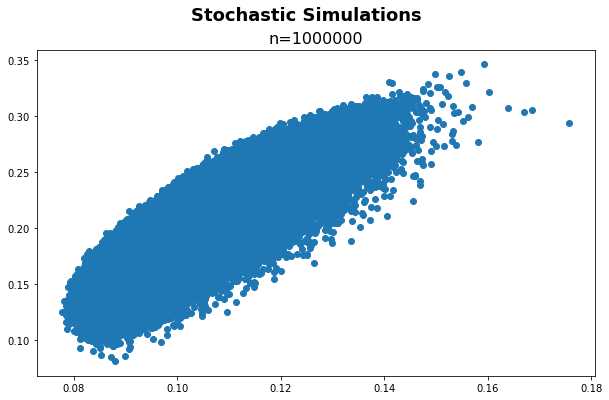

In [88]:
risk_list = []
return_list = []
simulations_target = 10**6 #1萬個樣本點

for i in range(simulations_target): #跑1萬次迴圈
    
    #random weighted
    weight = np.random.rand(total_stocks) #隨機產生長度為5的一維隨機陣列
    weight = weight / sum(weight) # 這邊的權重合不等於1
    
    #calculate result
    ret = sum(stocks_expected_return *weight)
    risk = np.sqrt(reduce(np.dot,[weight, covariance_matrix, weight.T]))
    
    
    #record
    return_list.append(ret)
    risk_list.append(risk)
    
fig = plt.figure(figsize= (10,6))
fig.suptitle('Stochastic Simulations', fontsize=18, fontweight='bold') #大標題

ax = fig.add_subplot()
ax.plot(risk_list,return_list,'o')
ax.set_title(f'n={simulations_target}', fontsize=16)

# 最小變異數投資組合

In [56]:
# 先定義投資組合的風險函數

def standard_deviation(weights):
    return np.sqrt( reduce(np.dot,[weights, covariance_matrix, weights.T]))

In [62]:
#scipy.optimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, 
                        # constraints=(), tol=None, callback=None, options=None)
# X0: Initial guess. Array of real elements of size (n,), where n is the number of independent variables.

# bounds:Sequence of (min, max) pairs for each element in x. None is used to specify no bound.

# constraints : 
#(1) type:str-->Constraint type: ‘eq’ for equality, ‘ineq’ for inequality. 
#(2) fun:callable-->The function defining the constraint.

In [63]:
x0 = stocks_weights #極小化過程的變數，各股票的投資權重
bounds = tuple((0,1) for x in range(total_stocks)) #每個變數(權重)的上下界，因為只有10檔股票，所以加上迴圈
constraints = [{'type' :'eq', 'fun':lambda x: sum(x)-1}]
minimize_variance = solver.minimize(standard_deviation, x0 =x0, constraints=constraints, bounds=bounds)
#設定所有變數總合為1，不考慮放空

mvp_risk = minimize_variance.fun
mvp_return = sum(minimize_variance.x *  stocks_expected_return)

print('風險最小化投資組合預期報酬率為:' + str(round(mvp_return,2)))
print('風險最小化投資組合風險(變異數)為:' + str(round(mvp_risk,2)))

風險最小化投資組合預期報酬率為:0.12
風險最小化投資組合風險(變異數)為:0.08


In [72]:
minimize_variance

     fun: 0.07524262837966762
     jac: array([0.08919853, 0.07513144, 0.07516081, 0.07546714, 0.07507504,
       0.07516693, 0.07595274, 0.09285363, 0.07553338, 0.08031721])
 message: 'Optimization terminated successfully'
    nfev: 122
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([2.25583031e-18, 2.11328204e-01, 4.20195307e-02, 1.21216301e-01,
       1.82712731e-01, 3.53360223e-01, 7.31318807e-02, 0.00000000e+00,
       1.62311296e-02, 4.75461691e-20])

In [75]:
#印出所有股票佔投資組合的權重
for i in range(total_stocks):
    stock_symbol = str(df.columns[i]) #股票代號
    weighted = str(format(minimize_variance.x[i],'.4f')) 
    #小數點後4位且四捨5入format(1.5388888,'.4f') --->1.5389
    print(f'{stock_symbol} 佔投資組合權重: {weighted}')

2317 佔投資組合權重: 0.0000
2542 佔投資組合權重: 0.2113
2881 佔投資組合權重: 0.0420
2324 佔投資組合權重: 0.1212
2535 佔投資組合權重: 0.1827
5880 佔投資組合權重: 0.3534
1101 佔投資組合權重: 0.0731
2330 佔投資組合權重: 0.0000
2301 佔投資組合權重: 0.0162
4938 佔投資組合權重: 0.0000


# 效率前緣程式碼

In [85]:
bounds

((0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1))

In [79]:
x0 = stocks_weights
bounds = tuple((0, 1) for x in range(total_stocks))
 
efficient_fronter_return_range = np.arange(0.05, 0.35, .005)
efficient_fronter_risk_list = []
 
for i in efficient_fronter_return_range: #0.05,0.055,...0.345
    constraints = [{'type': 'eq', 'fun': lambda x: sum(x) - 1},  #設定所有變數總合為1
                   {'type': 'eq', 'fun': lambda x: sum(x * stocks_expected_return) - i}] #透過改變股票權重，求給定報酬率下的風險最小值
    efficient_fronter = solver.minimize(standard_deviation, x0=x0, constraints=constraints, bounds=bounds)
    efficient_fronter_risk_list.append(efficient_fronter.fun)

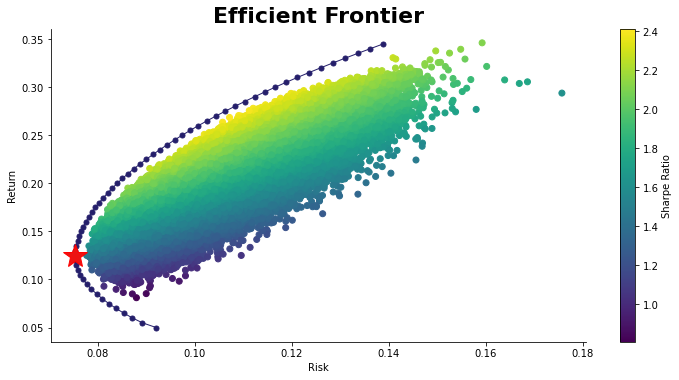

In [89]:
risk_free = 0.01
 
fig = plt.figure(figsize = (12,6))
fig.subplots_adjust(top=0.85)
ax = fig.add_subplot()
 
fig.subplots_adjust(top=0.85)
ax0 = ax.scatter(risk_list, return_list,
                c=(np.array(return_list)-risk_free)/np.array(risk_list),
                marker = 'o')
ax.plot(efficient_fronter_risk_list, efficient_fronter_return_range, linewidth=1, color='#251f6b', marker='o',
         markerfacecolor='#251f6b', markersize=5)
ax.plot(mvp_risk, mvp_return,'*',color='r', markerfacecolor='#ed1313',  markersize=25)
 
 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Efficient Frontier', fontsize=22, fontweight='bold')
ax.set_xlabel('Risk')
ax.set_ylabel('Return')
fig.colorbar(ax0, ax=ax, label = 'Sharpe Ratio')